In [11]:
import pandas as pd
from lifelines.datasets import load_dd
import matplotlib.pyplot as plt
data = load_dd()

In [20]:
data.to_csv('kme.csv',sep='\t')

In [19]:
data.sample(6)
#the boolean columns `observed` refers to whether the death (leaving office)
#was observed or not.

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
954,Lithuania,368,368.0,Northern Europe,Europe,Gediminas Vagnorius,Gediminas Vagnorius.Lithuania.1991.1991.Mixed Dem,Democracy,Mixed Dem,1991,1,1
1365,Senegal,433,433.0,Western Africa,Africa,Abdou Diouf,Abdou Diouf.Senegal.1981.1999.Civilian Dict,Non-democracy,Civilian Dict,1981,19,1
1418,Somalia,520,520.0,Eastern Africa,Africa,Mohammed Siyad Barreh,Mohammed Siyad Barreh.Somalia.1969.1990.Milita...,Non-democracy,Military Dict,1969,22,1
229,Bulgaria,355,355.0,Eastern Europe,Europe,Sergey Dimitrievich Stanishev,Sergey Dimitrievich Stanishev.Bulgaria.2005.20...,Democracy,Mixed Dem,2005,4,0
1043,Mexico,70,70.0,Central America,Americas,Ernesto Zedillo,Ernesto Zedillo.Mexico.1994.1999.Civilian Dict,Non-democracy,Civilian Dict,1994,6,1
1131,New Zealand,920,920.0,Australia and New Zealand,Oceania,Sidney Holland,Sidney Holland.New Zealand.1949.1956.Parliamen...,Democracy,Parliamentary Dem,1949,8,1


In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
KaplanMeierFitter.fit(durations, event_observed=None,
                      timeline=None, entry=None, label='KM_estimate',
                      alpha=None, left_censorship=False, ci_labels=None)

NameError: name 'durations' is not defined

In [7]:
T = data["duration"]
E = data["observed"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 1808 observations, 340 censored>

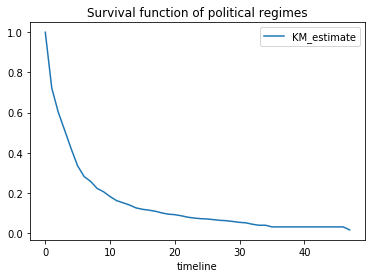

In [13]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

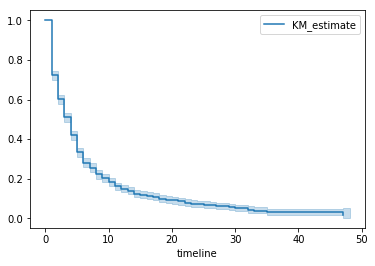

In [18]:
ax = kmf.plot()
plt.savefig('chart')